<a href="https://colab.research.google.com/github/Deepak-Katchi/ML-works/blob/master/Clustering_YouTube_trending_videos_INdia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Steps to follow

1. Intro to data,explaining data column wise

   Dropping Duplicates

2. Data counts

3. EDA
 
  
  1. Most viewed,least viewed, avg views

  2. Time taken to reach trending from the date of publishing
  
  3. No of days a video in trending
  
  4. Views vs video length
  
  5. Most  
  
  5. New feature score = videos(norm)+likes(norm)-dislikes(norm) , sort with max score
  
  

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
import pickle
import re
warnings.filterwarnings("ignore")

In [0]:
#df=pd.read_csv("data_files/INVideos.csv")

In [0]:
!cp gdrive/'My Drive'/case_study_youtube/INvideos.csv .

In [0]:
!ls

gdrive	INvideos.csv  sample_data


In [0]:
df=pd.read_csv("INvideos.csv")

In [0]:
print(df.shape)

(37352, 16)


In [0]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


**Observation**

The dataset contains 37352 data points each with 16 features.

Let's analyze each column

In [0]:
(df.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

**Observation**

The dataset contains columns video_id,trending_date and so on which are self explanatory

**Filling NaN values**

In [0]:
df.columns[df.isna().any()]

Index(['description'], dtype='object')

Dataframe has NaN values only in the description column. Lets replace NaN with empty string 

In [0]:
df.fillna(" ",inplace=True)

**De Duplication**

In [0]:
print("Number of duplicate rows : ",list(df.duplicated()).count(True))

Number of duplicate rows :  4263


In [0]:
print(4263/df.shape[0])

0.11413043478260869


**Observation**

Number of duplicate rows : 4263 out of 37352 i.e., 11.4% data

In [0]:
df=df.drop_duplicates()

In [0]:
print(df.shape)

(33089, 16)


In [0]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,33089.000000,3.308900e+04,3.308900e+04,3.308900e+04,33089.000000
mean,21.628154,9.963425e+05,2.558762e+04,1.576535e+03,2524.777660
std,6.493615,3.148111e+06,9.647320e+04,1.689573e+04,14769.825108
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000
25%,23.000000,1.127190e+05,7.870000e+02,9.800000e+01,72.000000
50%,24.000000,2.750270e+05,2.757000e+03,2.890000e+02,298.000000
75%,24.000000,7.320220e+05,1.201100e+04,9.320000e+02,1169.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000


In [0]:
print("Most viewed video")

Most viewed video


In [0]:
most_viewed=(df[df['views']==df['views'].max()])
print("Most viewed video:")
for i in ['title','views']:
  print("{} : {}".format(i,most_viewed[i].values[0]))

Most viewed video:
title : YouTube Rewind: The Shape of 2017 | #YouTubeRewind
views : 125432237


In [0]:
print("Least viewed video")

Least viewed video


In [0]:
df[df['views']==df['views'].min()][["title","description","views","trending_date"]]

,title,description,views,trending_date
29316,"Baapmanus - बापमाणूस - Episode 118 - May 01, ...","To watch FULL episode of Baapmanus, CLICK here...",4024,18.01.05


Mean of views: 996342.5065731814
Let us look at the plot of videos vs views


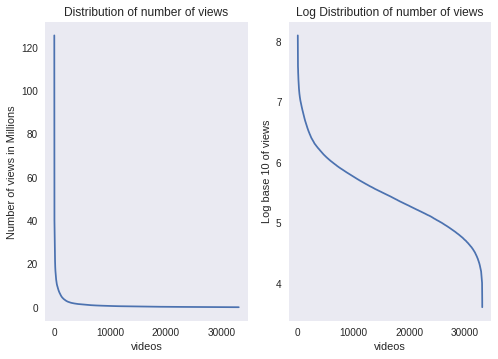

In [0]:
print("Mean of views:",df['views'].mean())
desc_view_counts=df.sort_values(by=['views'],ascending=False)['views']
print("Let us look at the plot of videos vs views")
plt.subplot(1,2,1)
plt.plot(range(1,df.shape[0]+1),(desc_view_counts)/1000000)
plt.title("Distribution of number of views")
plt.grid()
plt.xlabel("videos")
plt.ylabel("Number of views in Millions")

plt.subplot(1,2,2)
plt.plot(range(1,df.shape[0]+1),np.log10(desc_view_counts))
plt.title("Log Distribution of number of views")
plt.grid()
plt.xlabel("videos")
plt.ylabel("Log base 10 of views")

plt.show()

**Observation**

In [0]:
print("Most liked video")

Most liked video


In [0]:
df[df['likes']==df['likes'].max()][["title","description","likes","views","trending_date"]]

,title,description,likes,views,trending_date
5408,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,"YouTube Rewind 2017. Celebrating the videos, p...",2912710,125432237,17.12.12


In [0]:
print("Least liked video")

Least liked video


In [0]:
df[df['likes']==df['likes'].min()][["title","description","likes","views","trending_date"]].head(2)

,title,description,likes,views,trending_date
34,Breaking News IT Raid - நடந்தது என்ன? சிக்கியத...,Connect with Sathiyam TV online: http://sathiy...,0,33533,17.14.11
36,కెమెరాలో రికార్డ్ అయిన ఈ అద్భుతాన్ని చూస్తే ఆశ...,,0,128851,17.14.11


Mean of likes: 25587.621052313458
Let us look at the plot of videos vs likes


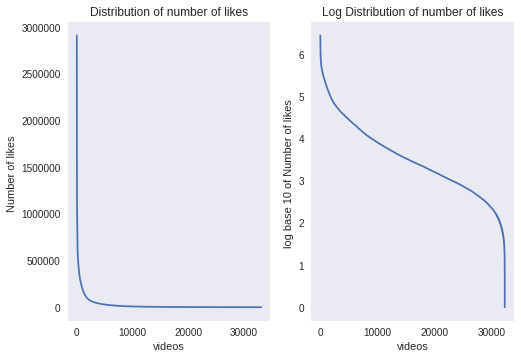

In [0]:
print("Mean of likes:",df['likes'].mean())
desc_likes_counts=df.sort_values(by=['likes'],ascending=False)['likes']
print("Let us look at the plot of videos vs likes")
plt.subplot(1,2,1)
plt.plot(range(1,df.shape[0]+1),(desc_likes_counts))
plt.title("Distribution of number of likes")
plt.grid()
plt.xlabel("videos")
plt.ylabel("Number of likes ")

plt.subplot(1,2,2)
plt.plot(range(1,df.shape[0]+1),np.log10(desc_likes_counts))
plt.title("Log Distribution of number of likes")
plt.grid()
plt.xlabel("videos")
plt.ylabel("log base 10 of Number of likes ")
plt.show()

## Bi Variate Analysis

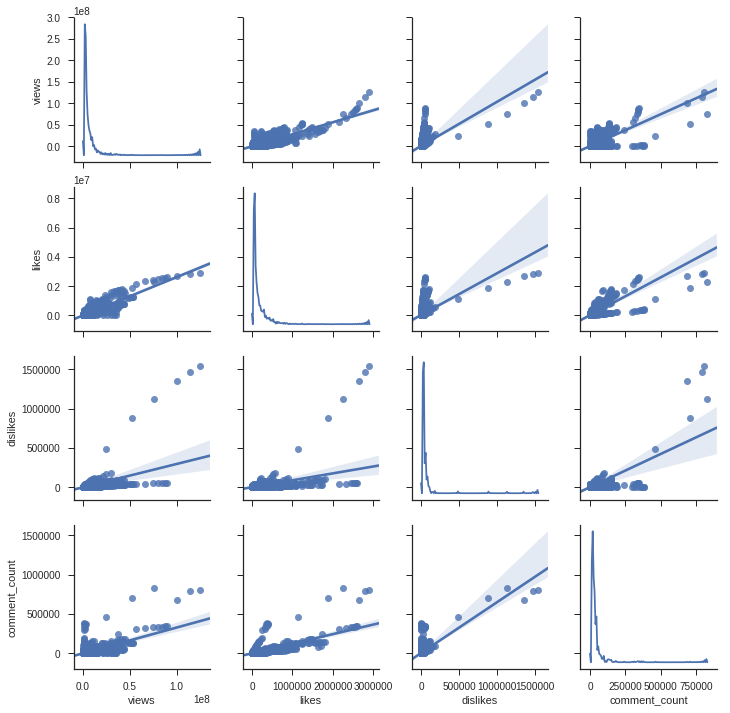

In [0]:
sns.set(style="ticks", color_codes=True)
data = df[['views','likes','dislikes','comment_count']]
g = sns.pairplot(data,diag_kind="kde",kind='reg')

**Observation**



In [0]:
corr_mat=df[['views','likes','dislikes','comment_count']].corr()

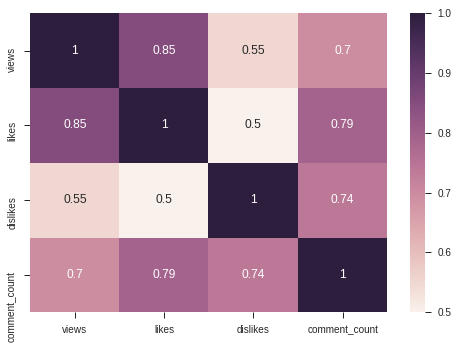

In [0]:
sns.heatmap(corr_mat,annot=True,robust =True)

## Trending Youtube Channel

In [0]:
unq_chn_count=len(list(df['channel_title'].unique()))
print(unq_chn_count)

1426


Of the entire dataset there are 1426 unique youtube channels

In [0]:
len(list(df['channel_title'].value_counts()))

1426

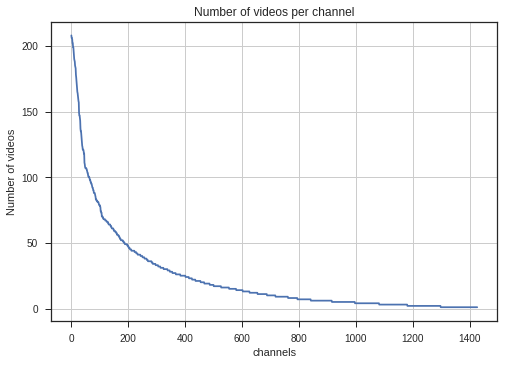

In [0]:
plt.plot(range(1,unq_chn_count+1),list(df['channel_title'].value_counts()))
plt.title("Number of videos per channel")
plt.grid()
plt.xlabel("channels")
plt.ylabel("Number of videos")
plt.show()

In [0]:
print("Top 10 Channels with more videos in trending\n\nChannel\t\t\tVideos count\n\n",df['channel_title'].value_counts()[0:10])

Top 10 Channels with more videos in trending

Channel			Videos count

 VikatanTV             208
ETV Plus India        206
SAB TV                206
etvteluguindia        205
Study IQ education    202
Flowers Comedy        202
Tarang TV             199
SET India             199
Mazhavil Manorama     196
RadaanMedia           193
Name: channel_title, dtype: int64


## No of days in trending

In [0]:
print(len(df['title'].unique()))

16721


Out of 33089 rows there are 16721 (50.5%) unique titles. This means that there are many videos listed in trending for more than one day. Lets figure out the numbers in detail

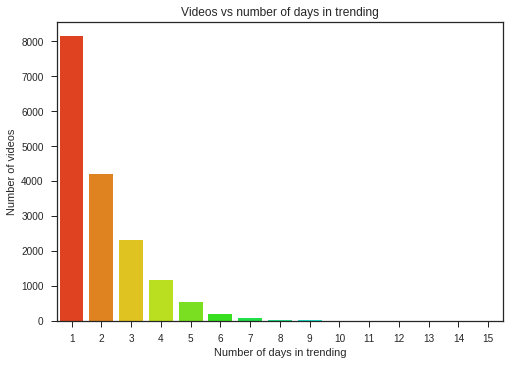

In [0]:
sns.countplot(df['title'].value_counts(), palette='gist_rainbow')
plt.title("Videos vs number of days in trending")
plt.ylabel("Number of videos")
plt.xlabel("Number of days in trending")
plt.show()

In [0]:
print("Videos trending for many days\t\t\t\t\t\t\tNumber of days in trending\n\n",df['title'].value_counts()[0:10])

Videos trending for many days							Number of days in trending

 Nandhini | Today @ 9 pm | Sun TV                                                                  15
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                      14
Sanju | Official Teaser | Ranbir Kapoor | Rajkumar Hirani                                         13
Kasthooriman || General Promo || Mon to Sat at 8:30 PM || Asianet                                 12
School Ke Wo Din - Amit Bhadana                                                                   11
Kaala (Tamil) - Official Teaser | Rajinikanth | Pa Ranjith | Dhanush | Santhosh Narayanan         10
Sanju | Official Trailer | Ranbir Kapoor | Rajkumar Hirani | Releasing on 29th June               10
Official Video: Raat Kamaal Hai | Guru Randhawa & Khushali Kumar | Tulsi Kumar | New Song 2018    10
Ed Sheeran - Happier (Official Video)                                                              9
Garmi Ke Side-Effects | As

## Number of days to reach trending

In [0]:
print()  #format=%Y-%M-%DT%H:%M:%S.000Z

In [0]:
df['days_publish_to_trending']=((pd.to_datetime(df['trending_date'].map(lambda x : '20'+x),format='%Y.%d.%m')) - pd.to_datetime(df['publish_time'].map(lambda x : x[0:10]),format='%Y-%m-%d')).map(lambda x:x.days)

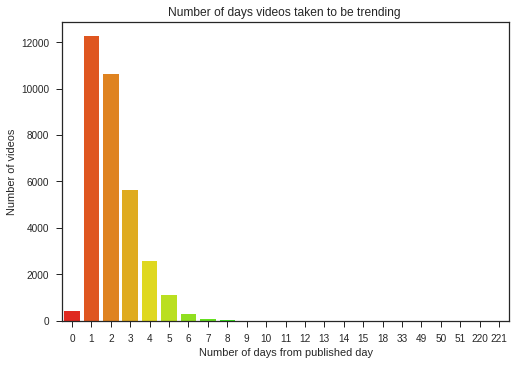

In [0]:
sns.countplot(df['days_publish_to_trending'], palette='gist_rainbow')
plt.title("Number of days videos taken to be trending ")
plt.ylabel("Number of videos")
plt.xlabel("Number of days from published day")
plt.show()

In [0]:
print("Videos trending on the day of publishing\n\n",df[df['days_publish_to_trending']==0][['title','views']].head(10))

Videos trending on the day of publishing

                                                   title   views
431   गुरुवार स्पेशल भजन : साईं बाबा रहमत की नज़र कर ...   66756
2373  RAMAYANAM PART- 7 | Bahubali Ramayanam | Unkno...   52202
2903  Dil De Kareeb | Garry Sandhu ( Full Video ) | ...  283742
3681  RAMAYANAM PART - 10 | CLIMAX | Unknown Facts A...   60051
5333  हनुमान चालीसा, Hanuman Chalisa Hari Om Sharan ...   36535
5524                 Gaali Vaaluga - A Tribute To #PSPK  355545
5554  क्या आप इस जगह पर उड़ सकते हो ? | 3 Places Wher...   56738
6499                                   ABP News is LIVE  631744
6717  Brock Lesnar's Royal Rumble challengers reveal...  899815
6720  Brock Lesnar  - Braun strowman -  Kane | WWe R...  223886


## Category ID

In [0]:
unq_cat_ids_cnt=len(list(df['category_id'].unique()))
print(unq_cat_ids_cnt)

17


All the 33k odd videos are categorised into a total of 17 categories

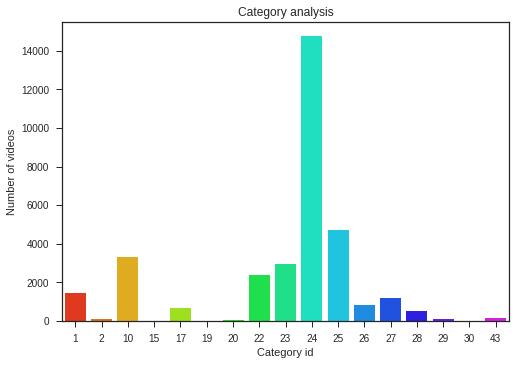

In [0]:
sns.countplot(df['category_id'], palette='gist_rainbow')
plt.title("Category analysis")
plt.ylabel("Number of videos")
plt.xlabel("Category id")
plt.show()

In [0]:
print(df['category_id'].value_counts())

24    14764
25     4709
10     3292
23     2967
22     2367
1      1463
27     1166
26      801
17      646
28      517
43      149
29      103
2        69
20       55
30       10
19        8
15        3
Name: category_id, dtype: int64


# Storing de duplicated data

In [0]:
df=df.sort_values(by=['publish_time','trending_date'])

In [0]:
pickle_out = open("deduplicated_data.pickle","wb")
pickle.dump(df, pickle_out)
pickle_out.close()

# Pre Processing

In [0]:
def text_preprocess(data):
    data=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", data)
    data=re.sub(r'\\n+'," ",data)
    data=data.replace("|"," ")
    data=re.sub(r'[?|!|\'|"|#|,|-|@|(|)]', "", data)
    data=data.replace(": "," ").replace("-"," ").replace(" :"," ")
    data=re.sub(r' +',' ',data).lower()
    return data
def channel_preprocess(data):
    data=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", data)
    data=re.sub(r'\\n+'," ",data)
    data=data.replace("|"," ")
    data=re.sub(r'[?|!|\'|"|#|,|-|@|(|)]', "", data)
    data=data.replace(":","").replace("-","")
    data=re.sub(r' ','',data).lower()
    return data

In [0]:
df_1=df
df_1['channel_title']=df_1['channel_title'].map(lambda x : channel_preprocess(x))
df_1["Text_Feature"]=df_1.title+" "+df_1.tags+" "+df_1.tags+" "+df_1.tags+" "+df_1.channel_title+" "+df_1.channel_title+" "+df_1.channel_title+" "+df_1.description
#df_1=df_1.drop(columns=['title','channel_title','tags','description','video_id','comments_disabled', 'ratings_disabled','thumbnail_link', 'video_error_or_removed'])

In [0]:
df_1['Text_Feature']=df_1['Text_Feature'].map(lambda x : text_preprocess(x))

In [0]:
df_1.shape

(33089, 18)

In [0]:
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime

# Vectorising using Word2Vec

In [0]:
data=df_1['Text_Feature']

In [0]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle


# Train your own Word2Vec model using your own text corpus
list_of_sent=[]
for sent in data.values:
    list_of_sent.append(sent.split())

In [0]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [0]:
print(w2v_model)

Word2Vec(vocab=52767, size=50, alpha=0.025)


In [0]:
w2v_words = list(w2v_model.wv.vocab)

In [0]:
len(w2v_words)

52767

In [0]:
w2v_model.wv.most_similar('music')

[('music.', 0.6329383254051208),
 ('hits', 0.5927462577819824),
 ('album', 0.5387020111083984),
 ('song', 0.5229119062423706),
 ('hit', 0.52237868309021),
 ('songs', 0.5196710228919983),
 ('musickeyboards', 0.5159090757369995),
 ('lumiere', 0.5138686299324036),
 ('cinestaan', 0.5136399865150452),
 ('pictures', 0.5107955932617188)]

In [0]:
from tqdm import tqdm

In [0]:
# average Word2Vec
# compute average word2vec for each review.
def avgw2v(list_of_sent):
    sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sent in tqdm(list_of_sent): # for each review/sentence
        sent_vec = np.zeros(50) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in w2v_words:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    print(len(sent_vectors))
    print(len(sent_vectors[0]))
    return sent_vectors

In [0]:
sent_vect=avgw2v(list_of_sent)

100%|██████████| 33089/33089 [24:56<00:00, 22.11it/s]

33089
50


In [0]:
std = StandardScaler()
std.fit(sent_vect)
data_vect=std.transform(sent_vect)

In [0]:
pickle_out = open("data_vect.pickle","wb")
pickle.dump(data_vect, pickle_out)
pickle_out.close()

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from prettytable import PrettyTable
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# ML Models

In [0]:
def perform_cv(model,parameters,x_train,y_train,x_test,y_test):
    #3 fold cv using time series split
    tscv=TimeSeriesSplit(n_splits=5)
    cv_model = GridSearchCV(model, param_grid=parameters, cv=tscv, verbose=1, n_jobs=-1,scoring='f1_micro')
    cv_model.fit(x_train,y_train)
    results={}
    results['model']=cv_model
    
    results['best_estimator']=cv_model.best_estimator_
    print('\nBest Estimator \n',cv_model.best_estimator_)
    
    results['best_params']=cv_model.best_params_
    print('\nBest Parameters:\n',cv_model.best_params_)
    
    results['best_score']=cv_model.best_score_
    print('\nBest F1 micro Cross Validation score : \n',cv_model.best_score_)
    
    y_pred = cv_model.predict(x_test)
    results['predict']=y_pred
    
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    results['accuracy']=accuracy
    print("\nTest accuracy : ",accuracy)
    
    f1_micro = metrics.f1_score(y_true=y_test, y_pred=y_pred,average='micro')
    results['f1_micro']=f1_micro
    print("\nTest F1 micro score : ",f1_micro)
    return results
    
    
    
    

## Model 1 Logistic Regression

In [0]:
!ls sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:

parameters = {'C':[0.01, 0.1, 1, 10, 100]}
model=LogisticRegression(penalty='l2',class_weight='balanced',n_jobs=-1)
w2v_log_reg_cv_results =  perform_cv(model,parameters, std_train_vectors, y_train, std_test_vectors, y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.3min finished



Best Estimator 
 LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

Best Parameters:
 {'C': 10}

Best F1 micro Cross Validation score : 
 0.6881347150259067

Test accuracy :  0.6997078674322554

Test F1 micro score :  0.6997078674322554


In [0]:

parameters = {'C':[0.01, 0.1, 1, 10, 100]}
model=LogisticRegression(penalty='l2',class_weight='balanced',n_jobs=-1)
w2v_log_reg_cv_results =  perform_cv(model,parameters, std_train_vectors, model_list[8].labels_, std_test_vectors, test_labels)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min finished



Best Estimator 
 LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

Best Parameters:
 {'C': 1}

Best F1 micro Cross Validation score : 
 0.9319689119170984

Test accuracy :  0.9225345018636043

Test F1 micro score :  0.9225345018636043


## Model 2 Decision Trees

In [0]:
parameters = {'max_depth':np.arange(3,50,2),'min_samples_split':[2,3,4,5,6],'min_samples_leaf':[2,3,4,5] }
dt_model = DecisionTreeClassifier(class_weight ='balanced')
w2v_dt_results=perform_cv(dt_model,parameters, std_train_vectors, y_train, std_test_vectors, y_test)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 262 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 862 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1312 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 1862 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 30.7min finished



Best Estimator 
 DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=35, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Best Parameters:
 {'max_depth': 35, 'min_samples_leaf': 2, 'min_samples_split': 2}

Best F1 micro Cross Validation score : 
 0.6203626943005182

Test accuracy :  0.6525637151203788

Test F1 micro score :  0.6525637151203788


In [0]:

parameters = {'max_depth':np.arange(3,30,2)}
dt_model = DecisionTreeClassifier(class_weight ='balanced',min_samples_split=2,min_samples_leaf=2)
w2v_dt_results=perform_cv(dt_model,parameters, std_train_vectors, model_list[8].labels_, std_test_vectors, test_labels)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   34.9s finished



Best Estimator 
 DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=25, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Best Parameters:
 {'max_depth': 25}

Best F1 micro Cross Validation score : 
 0.7809326424870466

Test accuracy :  0.7885564621738692

Test F1 micro score :  0.7885564621738692


In [0]:
len(test_labels)

23162

## Model 3 SVC

# Model 4 Clustering

In [0]:
from sklearn.metrics import silhouette_score

In [0]:
def k_means(data,cluster_range):
  models=[]
  score=[]
  loss=[]
  for k in cluster_range:
    kmeans=KMeans(n_clusters=k,init='k-means++',n_jobs=-1).fit(data)
    models.append(kmeans)
    loss.append(kmeans.inertia_)
    #score.append(silhouette_score(data,kmeans.labels_))
  plt.plot(cluster_range,loss)
  plt.xlabel('k-clusters')
  plt.ylabel('loss')
  plt.show()  
  return models

In [0]:
from collections import Counter

In [0]:
def cluster_analysis(train_data,k):
  
  
  #For each cluster
  for i in range(0,k):
    
    #Extract cleaned text column
    data=train_data[train_data['labels']==i]['Text_Feature'].values
    list_of_words=[];
    for sent in data:
      for word in sent.split():
        list_of_words.append(word)  
    final_text=" ".join(list_of_words)
    wordcloud = WordCloud(collocations=True).generate(final_text)
    plt.figure()
    title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
   

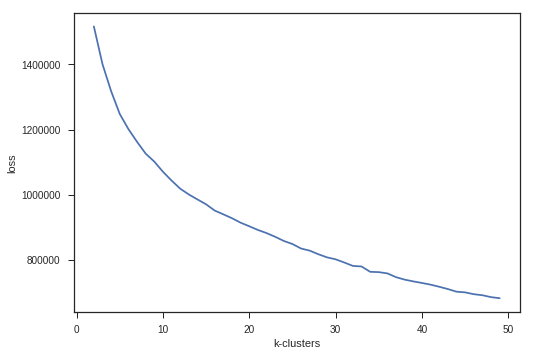

In [0]:
model_list=k_means(data_vect,range(2,50))

In [0]:
pickle_out = open("k_means_models.pickle","wb")
pickle.dump(model_list, pickle_out)
pickle_out.close()

In [0]:
from google.colab import files
files.download("k_means_models.pickle")

In [0]:
files.download("data_vect.pickle")

In [0]:
!cp gdrive/'My Drive'/case_study_youtube/k_means_models.pickle .

In [0]:
pickle_in = open("k_means_models.pickle","rb")
model_list = pickle.load(pickle_in)
pickle_in.close()

In [0]:
df_1['labels']=model_list[18].labels_

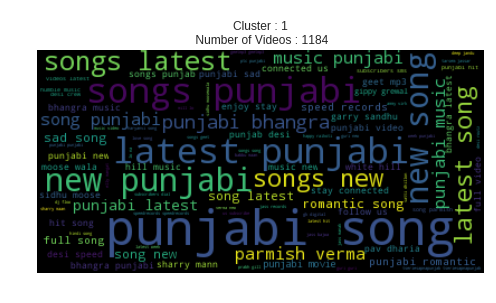

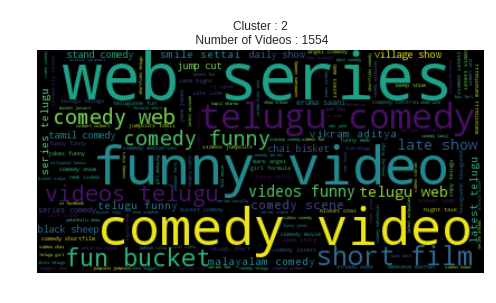

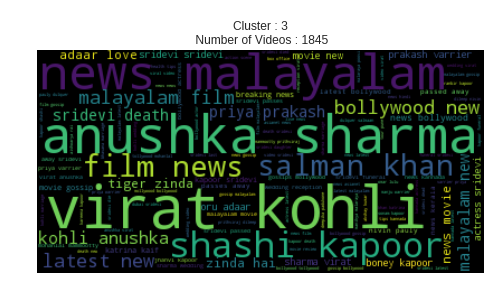

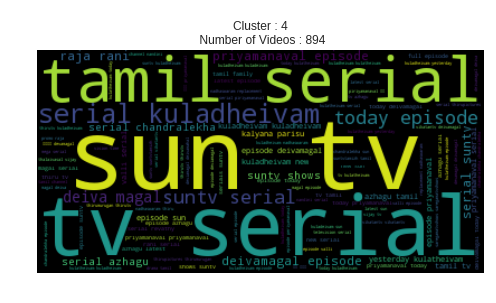

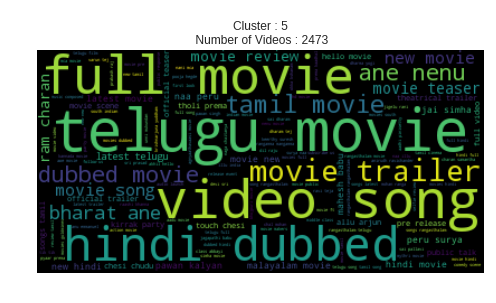

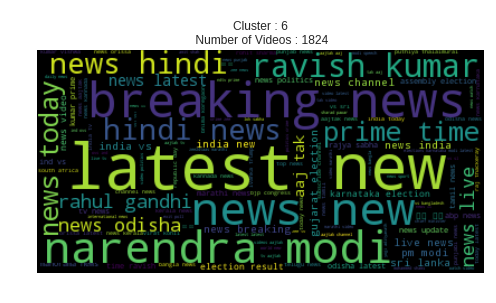

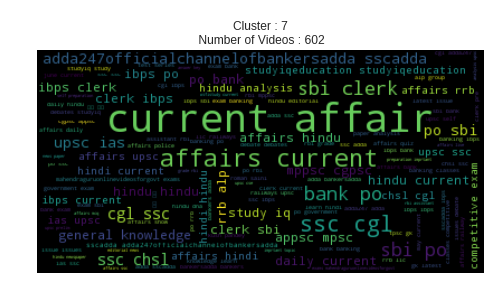

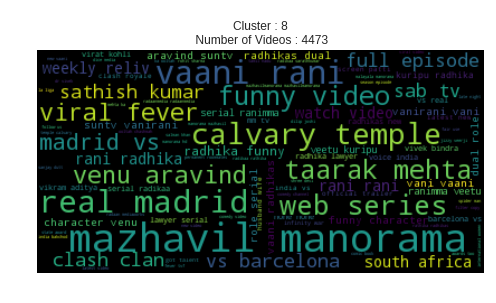

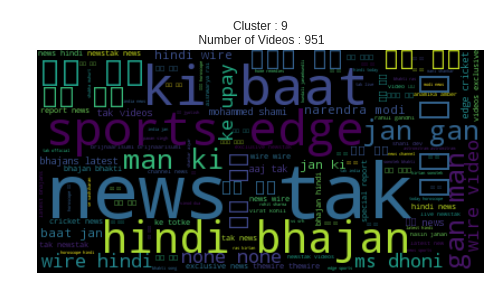

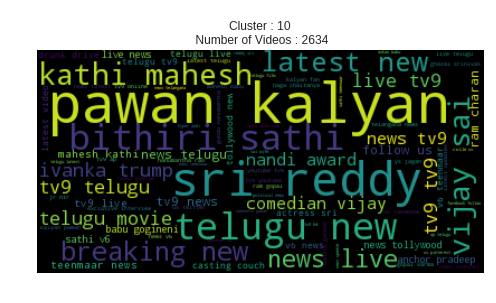

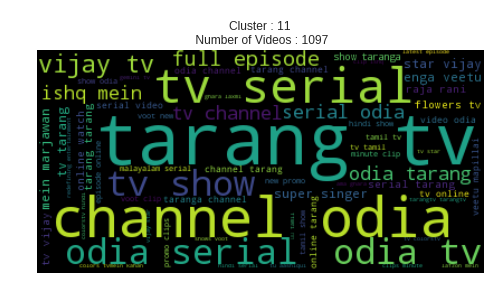

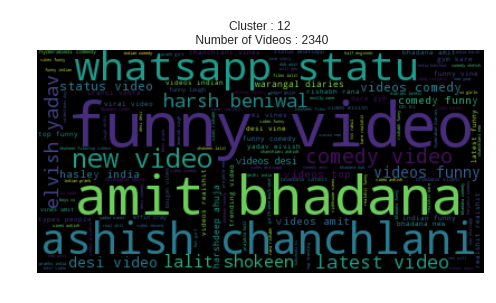

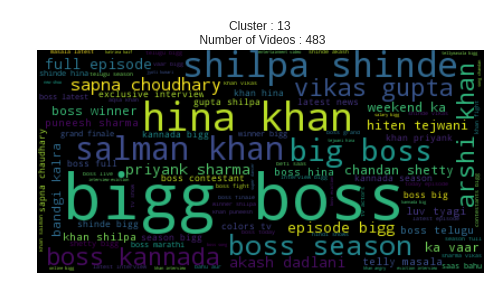

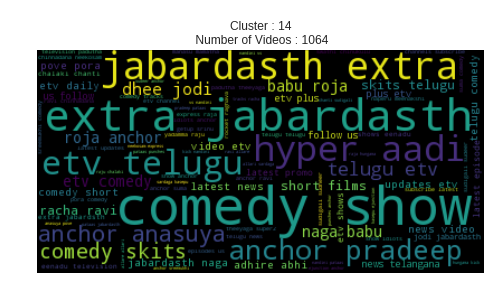

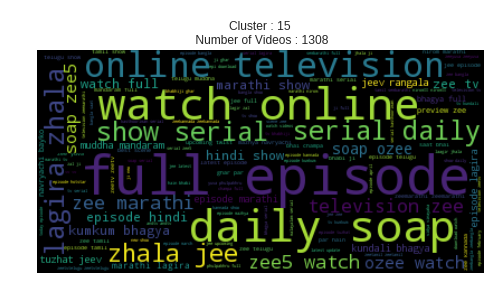

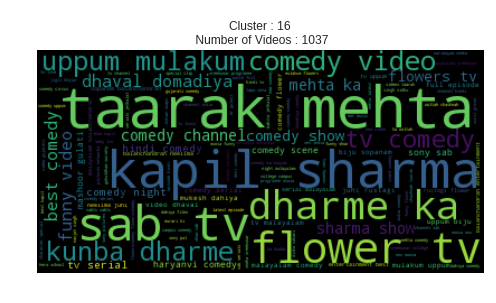

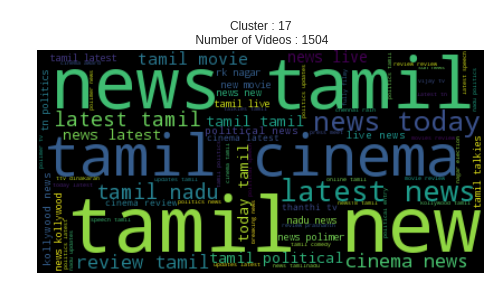

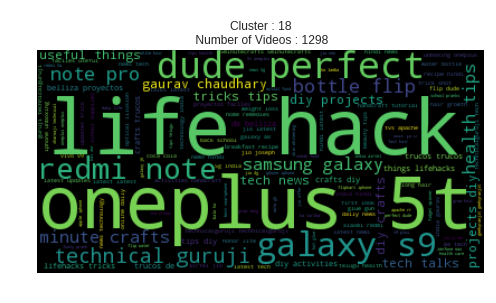

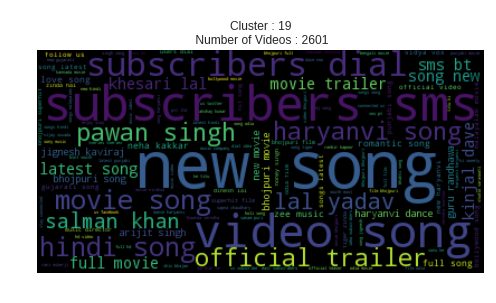

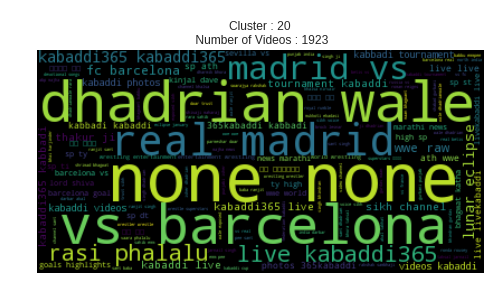

In [0]:
cluster_analysis(df_1,20)

# TSNE

In [0]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['|','|','|','|','|','_','_','_','_','_'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 20 and with 1000 iterations at max
Done..
saving this plot as image in present working directory...


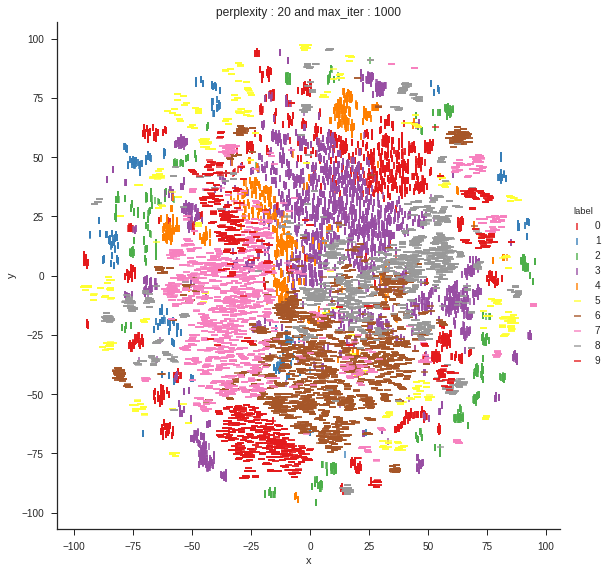

Done

performing tsne with perplexity 50 and with 1000 iterations at max
Done..
saving this plot as image in present working directory...


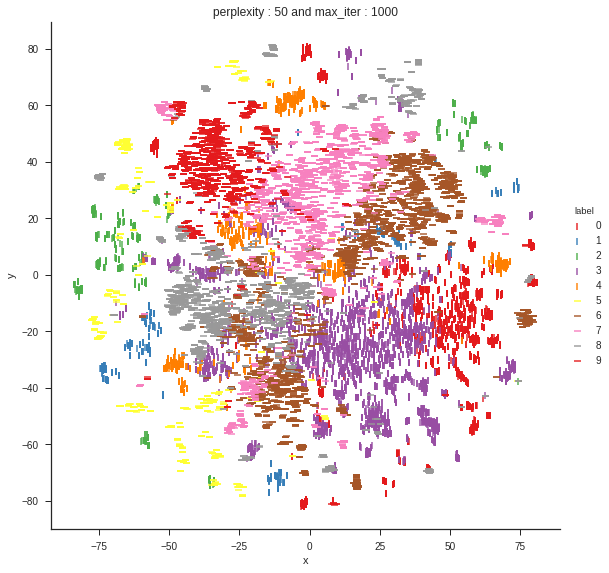

Done

performing tsne with perplexity 100 and with 1000 iterations at max
Done..
saving this plot as image in present working directory...


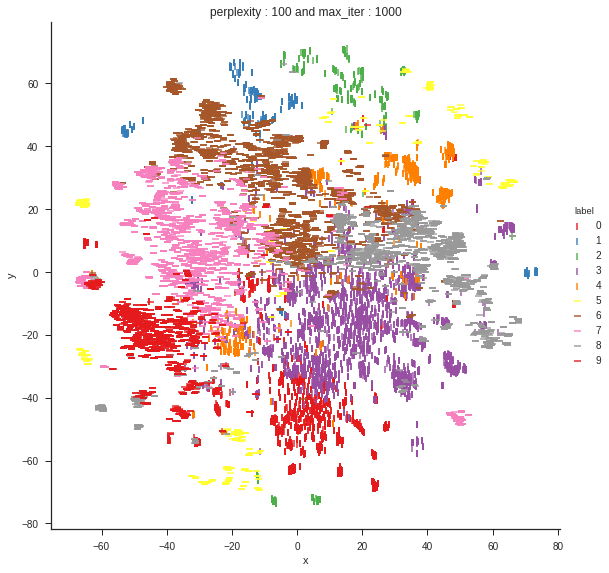

Done


In [0]:
X_pre_tsne = data_vect
y_pre_tsne = df_1['labels']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[20,50,100])

# Saving DataFrame with cluster labels

In [0]:
pickle_out = open("final_clustered_dataframe.pickle","wb")
pickle.dump(df_1, pickle_out)
pickle_out.close()

In [0]:
from google.colab import files
files.download("final_clustered_dataframe.pickle")